In [1]:
%load_ext pycodestyle_magic
%flake8_on --ignore E402,W291,W293 --max_line_length 120

In [2]:
# Import necessary libraries
import pandas as pd
import requests
import json
from urllib.parse import urlencode
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sns.set(font_scale=2,
        style="whitegrid",
        rc={'figure.figsize': (20, 7)})

In [4]:
# Save all links
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
customers_link = 'https://disk.yandex.ru/d/FUi5uSd6BfG_ig'
orders_link = 'https://disk.yandex.ru/d/t9Li4JOfgxuUrg'
order_items_link = 'https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw'

In [5]:
# Make requests and save responses
customers_response = requests.get(base_url + urlencode({'public_key': customers_link}))
orders_response = requests.get(base_url + urlencode({'public_key': orders_link}))
order_items_response = requests.get(base_url + urlencode({'public_key': order_items_link}))

In [6]:
# Get links to file
customers_file_link = json.loads(customers_response.text)['href']
orders_file_link = json.loads(orders_response.text)['href']
order_items_file_link = json.loads(order_items_response.text)['href']

In [7]:
# Load files to DataFrames

In [8]:
customers_df = pd.read_csv(customers_file_link)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
# customer_id — позаказный идентификатор пользователя (аналог номера паспорта)
# customer_unique_id —  уникальный идентификатор пользователя
# customer_zip_code_prefix —  почтовый индекс пользователя
# customer_city —  город доставки пользователя
# customer_state —  штат доставки пользователя

In [10]:
orders_df = pd.read_csv(orders_file_link)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
# order_id —  уникальный идентификатор заказа (номер чека)
# customer_id —  позаказный идентификатор пользователя (аналог номера паспорта)
# order_status —  статус заказа
# order_purchase_timestamp —  время создания заказа
# order_approved_at —  время подтверждения оплаты заказа
# order_delivered_carrier_date —  время передачи заказа в логистическую службу
# order_delivered_customer_date —  время доставки заказа
# order_estimated_delivery_date —  обещанная дата доставки

In [12]:
# Уникальные статусы заказов:
#     created —  создан
#     approved —  подтверждён
#     invoiced —  выставлен счёт
#     processing —  в процессе сборки заказа
#     shipped —  отгружен со склада
#     delivered —  доставлен пользователю
#     unavailable —  недоступен
#     canceled —  отменён

In [13]:
order_items_df = pd.read_csv(order_items_file_link)
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
# order_id —  уникальный идентификатор заказа (номер чека)
# order_item_id —  идентификатор товара внутри одного заказа
# product_id —  ид товара (аналог штрихкода)
# seller_id — ид производителя товара
# shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
# price —  цена за единицу товара
# freight_value —  вес товара

In [15]:
# Investigate our DFs

In [16]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [17]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [18]:
dates_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                 'order_delivered_customer_date', 'order_estimated_delivery_date']

In [19]:
orders_df[dates_columns] = orders_df[dates_columns].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S')

In [20]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [21]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [22]:
order_items_df.shipping_limit_date = pd.to_datetime(order_items_df.shipping_limit_date, format='%Y-%m-%d %H:%M:%S')

In [23]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [24]:
# Join all data in common DF.
# We will merge data using the inner method,
# since the presence in the table with orders of data about checks or users
# that are not in the corresponding tables may indicate either an error
# or, for example, that these orders are test (and were created to test the system).
# Therefore, these orders will be discarded using the specified type of merge.
full_data_df = orders_df.merge(customers_df, on='customer_id').merge(order_items_df, on='order_id')
full_data_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [25]:
full_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  object        
 3   order_purchase_timestamp       112650 non-null  datetime64[ns]
 4   order_approved_at              112635 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111456 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112650 non-null  datetime64[ns]
 8   customer_unique_id             112650 non-null  object        
 9   customer_zip_code_prefix       112650 non-null  int64         
 10  customer_city                  112650 non-null  object        
 11  

In [26]:
# When analyzing the data, all orders that have payment confirmation (order_approved_at column is not empty)
# and are not in the 'unavailable' or 'canceled' status will be considered a purchase.
# That is, the fact of payment is considered a purchase regardless of the fact of the transfer of the items,
# and the status of the order 'unavailable' is considered as the inability to provide the items
# before confirmation of the cancellation of the order by the customer.

In [27]:
# Let's create a DataFrame of purchases

In [28]:
unconvinient_statuses = ["unavailable", "canceled"]

In [29]:
purchases_data_df = full_data_df.dropna(subset=['order_approved_at']) \
                                .query('order_status not in @unconvinient_statuses')
purchases_data_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [30]:
# Check how many users have made only 1 purchase
purchases_data_df.groupby('customer_unique_id') \
                 .agg({'order_id': 'nunique'}) \
                 .rename(columns={'order_id': 'orders_quantity'}) \
                 .query('orders_quantity == 1') \
                 .shape[0]

92084

In [31]:
# Let's see how many orders on average per month are not delivered for various reasons
# (we will display the details for the reasons).
# Only those orders that have the 'unavailable' or 'canceled' status will be considered undelivered.

In [32]:
full_data_df['estimated_delivery_year'] = full_data_df.order_estimated_delivery_date.dt.year
full_data_df['estimated_delivery_month'] = full_data_df.order_estimated_delivery_date.dt.month

In [33]:
full_data_df.groupby(['estimated_delivery_year', 'estimated_delivery_month', 'order_status'], as_index=False) \
            .agg({'order_id': 'nunique'}) \
            .pivot(index=['estimated_delivery_year', 'estimated_delivery_month'],
                   columns='order_status', values='order_id') \
            .loc[:, ['canceled', 'unavailable']] \
            .fillna(0) \
            .mean()

order_status
canceled       18.44
unavailable     0.24
dtype: float64

In [34]:
# Let's see what day of the week each item is most often bought.

In [35]:
purchases_data_df['day_of_week'] = purchases_data_df['order_approved_at'].dt.day_name()

In [36]:
purchases_data_df.groupby('product_id') \
                 .agg({'day_of_week': 'value_counts'}) \
                 .unstack() \
                 .droplevel(level=0, axis=1) \
                 .idxmax(1)

product_id
00066f42aeeb9f3007548bb9d3f33c38       Sunday
00088930e925c41fd95ebfe695fd2655      Tuesday
0009406fd7479715e4bef61dd91f2462       Friday
000b8f95fcb9e0096488278317764d19       Friday
000d9be29b5207b54e86aa1b1ac54872      Tuesday
                                      ...    
fff6177642830a9a94a0f2cba5e476d1       Monday
fff81cc3158d2725c0655ab9ba0f712c       Monday
fff9553ac224cec9d15d49f5a263411f     Saturday
fffdb2d0ec8d6a61f0a0a0db3f25b441      Tuesday
fffe9eeff12fcbd74a2f2b007dde0c58    Wednesday
Length: 32726, dtype: object

In [37]:
# Let's see how many purchases each user has on average per week (by months).

In [38]:
purchases_data_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day_of_week
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Thursday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,Tuesday
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,Sunday
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,Monday
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,Monday


In [39]:
purchases_data_df['purchase_year'] = purchases_data_df.order_approved_at.dt.year
purchases_data_df['purchase_month'] = purchases_data_df.order_approved_at.dt.month

In [40]:
purchases_data_df['weeks_in_month'] = purchases_data_df.order_approved_at.dt.daysinmonth / 7

In [41]:
sum_orders = purchases_data_df.groupby(['customer_unique_id', 'purchase_year', 'purchase_month', 'weeks_in_month'],
                                       as_index=False) \
                              .agg({'order_id': 'count'}) \
                              .rename(columns={'order_id': 'orders_sum'})
sum_orders

,customer_unique_id,purchase_year,purchase_month,weeks_in_month,orders_sum
0,0000366f3b9a7992bf8c76cfdf3221e2,2018,5,4.428571,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018,5,4.428571,1
2,0000f46a3911fa3c0805444483337064,2017,3,4.428571,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017,10,4.428571,1
4,0004aac84e0df4da2b147fca70cf8255,2017,11,4.285714,1
...,...,...,...,...,...
96838,fffcf5a5ff07b0908bd4e2dbc735a684,2017,6,4.285714,2
96839,fffea47cd6d3cc0a88bd621562a9d061,2017,12,4.428571,1
96840,ffff371b4d645b6ecea244b27531430a,2017,2,4.000000,1
96841,ffff5962728ec6157033ef9805bacc48,2018,5,4.428571,1


In [42]:
sum_orders['avg_orders_per_week'] = sum_orders.apply(lambda x: x.orders_sum / x.weeks_in_month, axis=1)

In [43]:
sum_orders

,customer_unique_id,purchase_year,purchase_month,weeks_in_month,orders_sum,avg_orders_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018,5,4.428571,1,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018,5,4.428571,1,0.225806
2,0000f46a3911fa3c0805444483337064,2017,3,4.428571,1,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017,10,4.428571,1,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017,11,4.285714,1,0.233333
...,...,...,...,...,...,...
96838,fffcf5a5ff07b0908bd4e2dbc735a684,2017,6,4.285714,2,0.466667
96839,fffea47cd6d3cc0a88bd621562a9d061,2017,12,4.428571,1,0.225806
96840,ffff371b4d645b6ecea244b27531430a,2017,2,4.000000,1,0.250000
96841,ffff5962728ec6157033ef9805bacc48,2018,5,4.428571,1,0.225806


In [44]:
# Conduct a cohort analysis of users.
# We will identify the cohort with the highest retention for the 3rd month from January to December.

In [45]:
purchases_data_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day_of_week,purchase_year,purchase_month,weeks_in_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday,2017,10,4.428571
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Thursday,2018,7,4.428571
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday,2018,8,4.428571
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday,2017,11,4.285714
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday,2018,2,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,...,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,Tuesday,2018,2,4.000000
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,...,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,Sunday,2017,8,4.428571
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,Monday,2018,1,4.428571
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,Monday,2018,1,4.428571


In [46]:
first_purchase = purchases_data_df.groupby('customer_unique_id') \
                                  .agg({'order_approved_at': 'min'}) \
                                  .order_approved_at.dt.to_period('M')
first_purchase

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    2018-05
0000b849f77a49e4a4ce2b2a4ca5be3f    2018-05
0000f46a3911fa3c0805444483337064    2017-03
0000f6ccb0745a6a4b88665a16c9f078    2017-10
0004aac84e0df4da2b147fca70cf8255    2017-11
                                     ...   
fffcf5a5ff07b0908bd4e2dbc735a684    2017-06
fffea47cd6d3cc0a88bd621562a9d061    2017-12
ffff371b4d645b6ecea244b27531430a    2017-02
ffff5962728ec6157033ef9805bacc48    2018-05
ffffd2657e2aad2907e67c3e9daecbeb    2017-05
Name: order_approved_at, Length: 94970, dtype: period[M]

In [47]:
purchases_data_df['cohort'] = purchases_data_df.apply(lambda x: first_purchase.loc[x.customer_unique_id], axis=1)

In [48]:
purchases_data_df['event_month'] = purchases_data_df.order_approved_at.dt.to_period('M')

In [49]:
purchases_data_df['month_num_from_first_purchase'] = purchases_data_df['event_month'].sub(purchases_data_df['cohort']) \
                                                                                     .apply(lambda x: x.n)

In [50]:
cohort_table = purchases_data_df.pivot_table(values='customer_unique_id',
                                             index='cohort',
                                             columns='month_num_from_first_purchase',
                                             aggfunc='nunique')
cohort_table

month_num_from_first_purchase,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,288.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,716.0,4.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,2.0,2.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,1674.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN
2017-03,2580.0,13.0,9.0,9.0,9.0,4.0,4.0,8.0,8.0,3.0,10.0,3.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04,2301.0,14.0,5.0,4.0,6.0,6.0,8.0,6.0,8.0,4.0,5.0,2.0,2.0,1.0,2.0,2.0,3.0,NaN,NaN,NaN
2017-05,3543.0,19.0,17.0,14.0,11.0,12.0,15.0,5.0,9.0,9.0,10.0,12.0,7.0,2.0,7.0,8.0,NaN,NaN,NaN,NaN
2017-06,3110.0,14.0,11.0,12.0,8.0,11.0,11.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN


In [51]:
# Let's convert the number of users who completed the target action
# in subsequent months to the proportion of returning users.
cohort_table = cohort_table.div(cohort_table[0], axis=0)
cohort_table

month_num_from_first_purchase,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003472,NaN,NaN,0.003472,NaN,0.003472,NaN,0.003472,NaN,0.003472,NaN,0.003472,0.006944,0.006944
2016-12,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.005587,0.002793,0.001397,0.004190,0.001397,0.004190,0.001397,0.001397,NaN,0.002793,0.002793,0.006983,0.004190,0.001397,0.001397,0.002793,0.004190,0.001397,NaN
2017-02,1.0,0.002389,0.002389,0.001792,0.004182,0.001195,0.002389,0.001792,0.000597,0.001792,0.001195,0.002987,0.001195,0.001792,0.001195,0.000597,0.000597,0.002389,NaN,NaN
2017-03,1.0,0.005039,0.003488,0.003488,0.003488,0.001550,0.001550,0.003101,0.003101,0.001163,0.003876,0.001163,0.002326,0.001163,0.001550,0.002326,0.000775,0.001550,NaN,NaN
2017-04,1.0,0.006084,0.002173,0.001738,0.002608,0.002608,0.003477,0.002608,0.003477,0.001738,0.002173,0.000869,0.000869,0.000435,0.000869,0.000869,0.001304,NaN,NaN,NaN
2017-05,1.0,0.005363,0.004798,0.003951,0.003105,0.003387,0.004234,0.001411,0.002540,0.002540,0.002822,0.003387,0.001976,0.000564,0.001976,0.002258,NaN,NaN,NaN,NaN
2017-06,1.0,0.004502,0.003537,0.003859,0.002572,0.003537,0.003537,0.002251,0.001286,0.002251,0.003215,0.003537,0.001608,0.001286,0.001929,NaN,NaN,NaN,NaN,NaN


In [52]:
# Since we are interested in data from January to December,
# we will select data for 2017 since only this year contains the entire required period.
percent_cohort_2017 = cohort_table.loc['2017-01':'2017-12', 0:12]
percent_cohort_2017

month_num_from_first_purchase,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2017-01,1.0,0.005587,0.002793,0.001397,0.004190,0.001397,0.004190,0.001397,0.001397,NaN,0.002793,0.002793,0.006983
2017-02,1.0,0.002389,0.002389,0.001792,0.004182,0.001195,0.002389,0.001792,0.000597,0.001792,0.001195,0.002987,0.001195
2017-03,1.0,0.005039,0.003488,0.003488,0.003488,0.001550,0.001550,0.003101,0.003101,0.001163,0.003876,0.001163,0.002326
2017-04,1.0,0.006084,0.002173,0.001738,0.002608,0.002608,0.003477,0.002608,0.003477,0.001738,0.002173,0.000869,0.000869
2017-05,1.0,0.005363,0.004798,0.003951,0.003105,0.003387,0.004234,0.001411,0.002540,0.002540,0.002822,0.003387,0.001976
2017-06,1.0,0.004502,0.003537,0.003859,0.002572,0.003537,0.003537,0.002251,0.001286,0.002251,0.003215,0.003537,0.001608
2017-07,1.0,0.005297,0.003178,0.001854,0.003443,0.001854,0.003178,0.001059,0.001854,0.002383,0.002119,0.002913,0.001324
2017-08,1.0,0.006740,0.003611,0.002648,0.003852,0.005296,0.002648,0.002648,0.001204,0.001685,0.002407,0.001685,0.001444
2017-09,1.0,0.006590,0.004882,0.003417,0.004149,0.002685,0.002197,0.002197,0.003173,0.001709,0.002685,0.000732,NaN


Text(146.5, 0.5, 'Cohort')

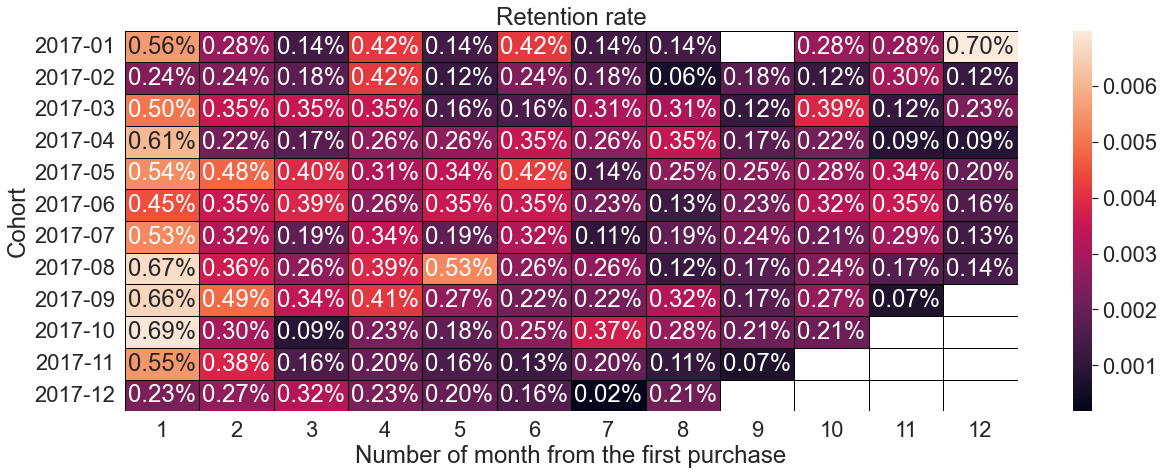

In [53]:
# For clarity, we visualize retention using a heatmap,
# removing 0 month (the month of the first purchase)
# and displaying the data as a percentage.
sns.heatmap(percent_cohort_2017.iloc[:, 1:], annot=True, 
            fmt='.2%', linewidths=1, linecolor='black')
plt.title('Retention rate')
plt.xlabel('Number of month from the first purchase')
plt.ylabel('Cohort')

As we can see, the highest retention of the 3rd month falls on the cohorts of users who made their first purchase in May 2017.

In [54]:
# Let's do an RFM analysis of our data.

In [55]:
# To determine the current day, let's look at the maximum date values for all data.
purchases_data_df.max()

order_id                         fffe41c64501cc87c801fd61db3f6244
customer_id                      ffffa3172527f765de70084a7e53aae8
order_status                                              shipped
order_purchase_timestamp                      2018-09-03 09:06:57
order_approved_at                             2018-09-03 17:40:06
order_delivered_carrier_date                  2018-09-11 19:48:28
order_delivered_customer_date                 2018-10-17 13:22:46
order_estimated_delivery_date                 2018-10-25 00:00:00
customer_unique_id               ffffd2657e2aad2907e67c3e9daecbeb
customer_zip_code_prefix                                    99990
customer_city                                              zortea
customer_state                                                 TO
order_item_id                                                  21
product_id                       fffe9eeff12fcbd74a2f2b007dde0c58
seller_id                        ffff564a4f9085cd26170f4732393726
shipping_l

In [56]:
# Since the shipping_limit_date and order_estimated_delivery_date columns are estimates rather than exact,
# it would be correct to take the maximum date available from the order_delivered_customer_date column,
# i.e. 2018-10-17 13:22:46. Based on this, we will assume that the data analysis was carried out on 2018-10-18,
# and we will consider the time as 09:00.

In [57]:
current_date = pd.Timestamp(2018, 10, 18, 9)
current_date

Timestamp('2018-10-18 09:00:00')

In [58]:
data_for_rfm = purchases_data_df.groupby('customer_unique_id') \
                                .agg({'order_approved_at': lambda x: current_date - x.max(),
                                      'order_id': 'nunique',
                                      'price': 'sum'}) \
                                .rename(columns={'order_approved_at': 'Recency',
                                                 'order_id': 'Frequency',
                                                 'price': 'Monetary'})
data_for_rfm

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,160 days 21:48:42,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,163 days 14:34:16,1,18.90
0000f46a3911fa3c0805444483337064,586 days 11:54:57,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,370 days 12:10:43,1,25.99
0004aac84e0df4da2b147fca70cf8255,337 days 12:53:08,1,180.00
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,496 days 11:44:44,1,1570.00
fffea47cd6d3cc0a88bd621562a9d061,311 days 12:43:40,1,64.89
ffff371b4d645b6ecea244b27531430a,617 days 16:57:16,1,89.90


In [59]:
# Let's look at the descriptive statistics of the data to determine how to segment it.
data_for_rfm.describe()

,Recency,Frequency,Monetary
count,94970,94970.000000,94970.000000
mean,287 days 14:20:55.904569864,1.033853,142.073605
std,152 days 22:54:24.354354938,0.210801,216.085833
min,44 days 15:19:54,1.000000,0.850000
25%,163 days 13:44:39.250000,1.000000,47.900000
50%,268 days 09:06:54.500000,1.000000,89.890000
75%,396 days 15:15:34.500000,1.000000,155.000000
max,762 days 20:43:22,16.000000,13440.000000


In [60]:
# The use of the above quartiles is absolutely irrelevant for the Frequency column.
# Therefore, let's try to calculate quartiles for the unique values of each column.

In [61]:
r_per_25, r_pre_50, r_pre_75 = np.percentile(data_for_rfm.Recency.unique(), [25, 50, 75])
r_per_25, r_pre_50, r_pre_75 = pd.to_timedelta(r_per_25), pd.to_timedelta(r_pre_50), pd.to_timedelta(r_pre_75)
print('25th percentile: ' + str(r_per_25), '\n50th percentile: ' + str(r_pre_50), '\n75th percentile: ' + str(r_pre_75))

25th percentile: 168 days 18:17:12 
50th percentile: 275 days 21:50:13 
75th percentile: 407 days 05:55:42


In [62]:
f_per_25, f_pre_50, f_pre_75 = np.percentile(data_for_rfm.Frequency.unique(), [25, 50, 75])
print('25th percentile: ' + str(f_per_25), '\n50th percentile: ' + str(f_pre_50), '\n75th percentile: ' + str(f_pre_75))

25th percentile: 3.0 
50th percentile: 5.0 
75th percentile: 7.0


In [63]:
m_per_25, m_pre_50, m_pre_75 = np.percentile(data_for_rfm.Monetary.unique(), [25, 50, 75])
print('25th percentile: ' + str(m_per_25), '\n50th percentile: ' + str(m_pre_50), '\n75th percentile: ' + str(m_pre_75))

25th percentile: 75.6075 
50th percentile: 164.845 
75th percentile: 358.825


In [64]:
# These quartiles do not differ much in the Recency column from the quartiles of the DataFrame,
# while the Frequency column has acquired different values for quartiles,
# and the values of the Monetary column have almost doubled but are also acceptable for user segmentation.
# Therefore, we will use these values to assign segments.

In [65]:
edges = [data_for_rfm.Recency.min(), r_per_25, r_pre_50, r_pre_75, data_for_rfm.Recency.max()]
data_for_rfm['R'], recency_bins = pd.cut(data_for_rfm.Recency,
                                         edges,
                                         labels=[1, 2, 3, 4],
                                         include_lowest=True,
                                         retbins=True)
data_for_rfm

,Recency,Frequency,Monetary,R
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,160 days 21:48:42,1,129.90,1
0000b849f77a49e4a4ce2b2a4ca5be3f,163 days 14:34:16,1,18.90,1
0000f46a3911fa3c0805444483337064,586 days 11:54:57,1,69.00,4
0000f6ccb0745a6a4b88665a16c9f078,370 days 12:10:43,1,25.99,3
0004aac84e0df4da2b147fca70cf8255,337 days 12:53:08,1,180.00,3
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,496 days 11:44:44,1,1570.00,4
fffea47cd6d3cc0a88bd621562a9d061,311 days 12:43:40,1,64.89,3
ffff371b4d645b6ecea244b27531430a,617 days 16:57:16,1,89.90,4


In [66]:
edges = [data_for_rfm.Frequency.min(), f_per_25, f_pre_50, f_pre_75, data_for_rfm.Frequency.max()]
data_for_rfm['F'], frequency_bins = pd.cut(data_for_rfm.Frequency,
                                           edges,
                                           labels=[4, 3, 2, 1],
                                           include_lowest=True,
                                           retbins=True)
data_for_rfm

,Recency,Frequency,Monetary,R,F
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,160 days 21:48:42,1,129.90,1,4
0000b849f77a49e4a4ce2b2a4ca5be3f,163 days 14:34:16,1,18.90,1,4
0000f46a3911fa3c0805444483337064,586 days 11:54:57,1,69.00,4,4
0000f6ccb0745a6a4b88665a16c9f078,370 days 12:10:43,1,25.99,3,4
0004aac84e0df4da2b147fca70cf8255,337 days 12:53:08,1,180.00,3,4
...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,496 days 11:44:44,1,1570.00,4,4
fffea47cd6d3cc0a88bd621562a9d061,311 days 12:43:40,1,64.89,3,4
ffff371b4d645b6ecea244b27531430a,617 days 16:57:16,1,89.90,4,4


In [67]:
edges = [data_for_rfm.Monetary.min(), m_per_25, m_pre_50, m_pre_75, data_for_rfm.Monetary.max()]
data_for_rfm['M'], monetary_bins = pd.cut(data_for_rfm.Monetary,
                                          edges,
                                          labels=[4, 3, 2, 1],
                                          include_lowest=True,
                                          retbins=True)
data_for_rfm

,Recency,Frequency,Monetary,R,F,M
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,160 days 21:48:42,1,129.90,1,4,3
0000b849f77a49e4a4ce2b2a4ca5be3f,163 days 14:34:16,1,18.90,1,4,4
0000f46a3911fa3c0805444483337064,586 days 11:54:57,1,69.00,4,4,4
0000f6ccb0745a6a4b88665a16c9f078,370 days 12:10:43,1,25.99,3,4,4
0004aac84e0df4da2b147fca70cf8255,337 days 12:53:08,1,180.00,3,4,2
...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,496 days 11:44:44,1,1570.00,4,4,1
fffea47cd6d3cc0a88bd621562a9d061,311 days 12:43:40,1,64.89,3,4,4
ffff371b4d645b6ecea244b27531430a,617 days 16:57:16,1,89.90,4,4,3


In [68]:
# Assign each user a final RFM segment
data_for_rfm['RFM'] = data_for_rfm['R'].astype(str) + \
    data_for_rfm['F'].astype(str) + \
    data_for_rfm['M'].astype(str)
data_for_rfm

,Recency,Frequency,Monetary,R,F,M,RFM
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,160 days 21:48:42,1,129.90,1,4,3,143
0000b849f77a49e4a4ce2b2a4ca5be3f,163 days 14:34:16,1,18.90,1,4,4,144
0000f46a3911fa3c0805444483337064,586 days 11:54:57,1,69.00,4,4,4,444
0000f6ccb0745a6a4b88665a16c9f078,370 days 12:10:43,1,25.99,3,4,4,344
0004aac84e0df4da2b147fca70cf8255,337 days 12:53:08,1,180.00,3,4,2,342
...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,496 days 11:44:44,1,1570.00,4,4,1,441
fffea47cd6d3cc0a88bd621562a9d061,311 days 12:43:40,1,64.89,3,4,4,344
ffff371b4d645b6ecea244b27531430a,617 days 16:57:16,1,89.90,4,4,3,443


In [69]:
# Let's look at the number of users in each segment
data_for_rfm['RFM'].value_counts()

144    10724
244    10548
344    10114
444    10064
143     8515
243     8176
343     7839
443     7030
142     4064
242     4006
342     3864
442     3666
141     1710
241     1582
341     1544
441     1476
131       14
231        8
132        5
121        4
331        4
221        3
232        3
434        2
424        1
211        1
111        1
431        1
332        1
Name: RFM, dtype: int64

Assign users more interpretable segments:
* Top customers – current, frequent, large revenues
* Active customers – continuous revenue
* Emerging customers – potential for cross- and upselling
* Unsteady customers – potential for cross- and upselling depending on the offer
* Customers at risk – Non-current but partly frequent and high revenues
* Potential lost customers
* Inactive customers – non-current, rare but high revenues
* Lost customers – non-current, rare, low revenues

In [70]:
segments = {'Top customers': ['111', '121', '112', '122'],
            'Active customers': ['131', '132', '113', '123', '133', '114', '124', '134'],
            'Emerging customers': ['211', '221', '231', '212', '222', '232'],
            'Unsteady customers': ['141', '142', '143', '144', '241', '242', '213', '223', '233',
                                   '243', '214', '224', '234', '244'],
            'Customers at risk': ['311', '312', '313', '314', '321', '322', '323', '324', '331',
                                  '332', '341', '342', '411', '412', '413', '414', '421', '422', '423', '424'],
            'Potential lost customers': ['333', '334', '343', '344'],
            'Inactive customers': ['441', '442'],
            'Lost customers': ['443', '444']}

In [71]:
def segmentation(rfm):
    for i, v in segments.items():
        if rfm in v:
            return i

In [72]:
data_for_rfm['Segment'] = data_for_rfm['RFM'].apply(segmentation)
data_for_rfm

,Recency,Frequency,Monetary,R,F,M,RFM,Segment
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,160 days 21:48:42,1,129.90,1,4,3,143,Unsteady customers
0000b849f77a49e4a4ce2b2a4ca5be3f,163 days 14:34:16,1,18.90,1,4,4,144,Unsteady customers
0000f46a3911fa3c0805444483337064,586 days 11:54:57,1,69.00,4,4,4,444,Lost customers
0000f6ccb0745a6a4b88665a16c9f078,370 days 12:10:43,1,25.99,3,4,4,344,Potential lost customers
0004aac84e0df4da2b147fca70cf8255,337 days 12:53:08,1,180.00,3,4,2,342,Customers at risk
...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,496 days 11:44:44,1,1570.00,4,4,1,441,Inactive customers
fffea47cd6d3cc0a88bd621562a9d061,311 days 12:43:40,1,64.89,3,4,4,344,Potential lost customers
ffff371b4d645b6ecea244b27531430a,617 days 16:57:16,1,89.90,4,4,3,443,Lost customers


In [73]:
data_for_rfm['Segment'].value_counts()

Unsteady customers          49325
Potential lost customers    17953
Lost customers              17094
Customers at risk            5414
Inactive customers           5142
Active customers               19
Emerging customers             15
Top customers                   5
Name: Segment, dtype: int64

In [74]:
# Let's look at mean and median our user new segments

In [75]:
data_for_rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean(numeric_only=False)

,Recency,Frequency,Monetary
Segment,,,
Active customers,105 days 15:49:59.263157894,4.157895,827.885263
Customers at risk,336 days 04:22:37.080162540,1.078870,368.631823
Emerging customers,217 days 11:24:01.666666668,5.200000,588.934000
Inactive customers,510 days 03:24:23.055036952,1.058732,377.628456
Lost customers,507 days 17:08:32.931613432,1.016907,71.049596
Potential lost customers,335 days 15:44:37.712638556,1.017602,73.426406
Top customers,101 days 14:57:27.400000,8.400000,693.600000
Unsteady customers,165 days 09:09:11.723912822,1.034709,141.792363


In [76]:
data_for_rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].median(numeric_only=False)

,Recency,Frequency,Monetary
Segment,,,
Active customers,117 days 07:44:15,4.0,494.48
Customers at risk,328 days 17:35:56,1.0,258.00
Emerging customers,210 days 13:49:36,5.0,547.14
Inactive customers,504 days 04:44:33.500000,1.0,257.89
Lost customers,499 days 18:21:16,1.0,62.60
Potential lost customers,327 days 21:08:18,1.0,66.90
Top customers,112 days 07:48:39,7.0,687.76
Unsteady customers,167 days 16:43:16,1.0,89.90
